In [38]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Fourier Transforms

So we've learned about Fourier series, which are ways to express a function of time as multiple functions. But there are many ways to represent functions, and they are not just limited to time.

For example, what if we wanted to look at the frequencies of a signal?

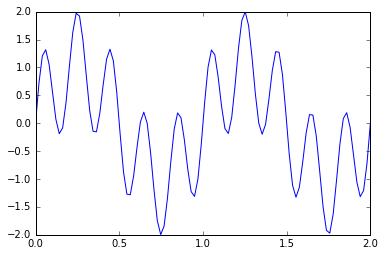

In [5]:
t = np.linspace(0,2,100)
y = np.sin(2*np.pi*t) + np.sin(10*np.pi*t)

plt.plot(t,y)

Here we've generated a signal with two frequencies, added together: $1$ and $5$. What if we eanted to express this signal as a function of its frequencies, instead of a function of time?

To do that, we can utilize an operation called the Fourier Transform. Like a Fourier Series, there are two kinds: the continuous and discrete Fourier Transform. We'll start with examples of the Continuous to get an idea of how they work, and then do most of our work with the Discrete Fourier Transform (or DFT).

## Continuous Fourier Transform

The continuous Fourier transform can be expressed as:

$$F(\omega) = \int_{-\infty}^{\infty} f(t)e^{-j\omega t} dt$$

In non-math terms, what we're doing is taking every instance in time (from negative infinity to infinity) and multiplying it by $e^{-j\omega t}$ to express our time-based signal as a function of $\omega$, the frequency. 

Let's quickly do an example of a Fourier Transform, using the above signal as an example. Plugging our function in for $f(t)$

$$\int_{-\infty}^{\infty}(\sin(2\pi t) + \sin(10\pi t))e^{-j\omega t}dt$$ 
$$ = \int_{-\infty}^{\infty}\frac{ e^{j2\pi t} - e^{-j2\pi t} + e^{j10\pi t} - e^{-j10\pi t}}{2j}e^{-j\omega t} dt $$
$$ = \int_{-\infty}^{\infty}\frac{ e^{j(2\pi - \omega) t} - e^{-j(2\pi + \omega) t} + e^{j(10\pi -\omega) t} - e^{-j(10\pi + \omega) t}}{2j}dt$$
$$ = \frac{1}{2j} (\frac{e^{jt(2\pi - \omega)}}{2\pi - \omega} - \frac{e^{jt(2\pi + \omega)}}{2\pi + \omega} + \frac{e^{jt(10\pi - \omega)}}{10\pi - \omega} - \frac{e^{jt(10\pi + \omega)}}{10\pi + \omega})\Bigr|_{\substack{t=\infty\\t=-\infty}} $$
$$ = \frac{1}{2j}(\delta(\omega-2\pi) - \delta(\omega+2\pi) + \delta(\omega-10\pi) -\delta(\omega+10\pi))$$

...wait, what happened on that last line?

The new functions you see are called Dirac Delta functions, or the unit impulse. It's defined as:

$$\delta(t) = \begin{cases} 
      \infty & t=0 \\
      0 & t \neq 0\\
   \end{cases}
$$

They're meant to represent a single event occuring on our scale, and nowhere else. So when we have a function $f(t)$ like the one above with frequencies 1 and 5, we will end up with these Dirac Delta functions indicating that there are, in fact, frequencies at 1 and 5!

One interesting thing to note is that there exist both positive and negative frequencies. This is because any real-valued signal will have a symmetric Fourier transform around the zero-axis. Complex-valued signals will invert on the other side of the zero-axis. This doesn't necessarily mean that negative frequencies exist (they don't) but it's an artifact of the math that goes on behind the transform itself.

Note that the Fourier Transform is in terms of radians, not Hertz - if we divide by $2\pi$ we find the frequencies we talk about.

### Magnitude and Phase

There are two components that make up the Fourier Transform, and that is it's magnitude and it's phase. Magnitude is relatively simple, and it's what we usually use when we look at a Fourier Transform. It's just the absolute value of the transform.

For example, the magnitude of the signal above will be, as a plot:

(0, 2)

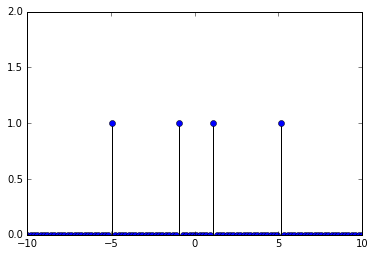

In [39]:
freqs = np.linspace(-10,10,100)
transform_mag = [0 for i in range(0, len(freqs))]

# I defined these by hand, since this is continuous and therefore
# not something the computer can do.
transform_mag[25] = 1
transform_mag[45] = 1
transform_mag[55] = 1
transform_mag[75] = 1
        
        
plt.plot(freqs, transform_mag, 'o')
plt.vlines([freqs[25],freqs[45],freqs[55], freqs[75]],0,1)
plt.ylim([0,2])
